In [1]:
import geopandas as gpd
dsm = "/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif"
dtm = "/Users/Jorg/3D_houses_data/DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif"
shpfile = gpd.read_file("/Users/Jorg/3D_houses_data/DHMVIIDTMRAS1m_k01/DHMVII_vdc_k01/DHMVII_vdc_k01.shp")
shpfile


,Id,OpnDatum1,OpnDatum2,geometry
0,0,2013-02-20,None,"MULTIPOLYGON Z (((162079.010 238604.770 0.000,..."
1,0,2013-04-01,None,"POLYGON Z ((148803.300 243432.780 0.000, 14882..."
2,0,2013-02-20,2013-04-01,"MULTIPOLYGON Z (((156554.470 243736.800 0.000,..."


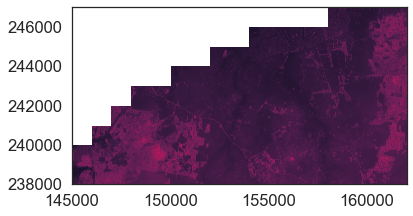

<AxesSubplot:>

In [2]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use geopandas for vector data and rasterio for raster data
import geopandas as gpd
import rasterio as rio
# Plotting extent is used to plot raster & vector data together
from rasterio.plot import show
import numpy as np

import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

#rio.open("/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k01/GeoTIFF/")

DSM1 = ("/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif")
image = rio.open(DSM1)
show(image)

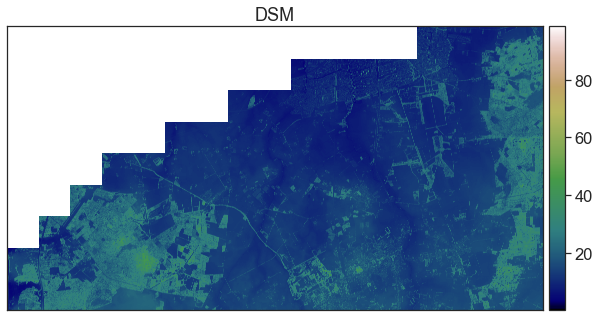

<AxesSubplot:title={'center':'DSM'}>

In [3]:

# Open the DEM with Rasterio
with rio.open(dsm, masked=True) as src:
    elevation = src.read(1)
    # Set masked values to np.nan
    elevation[elevation < 0] = np.nan

# Plot the data
ep.plot_bands(
    elevation,
    cmap="gist_earth",
    title="DSM",
    figsize=(10, 6),
)


#plot.dsm(robust=True)
#plt.show()

In [5]:
g = [i for i in shpfile.geometry]

all_coords = []

for b in g[0].boundary:
    coords = np.dstack(b.coords.xy).tolist()
    all_coords.append(*coords)
all_coords

/var/folders/nh/_lkctsl16l393rkzcyztswd80000gn/T/ipykernel_22301/505858597.py:5: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for b in g[0].boundary:


[[[162079.0100390613, 238604.76999878138],
  [162098.55007813126, 238604.11000274494],
  [162099.80984375626, 238605.04999755695],
  [162099.99985607713, 238609.5300009176],
  [162099.99992141128, 238605.86000366136],
  [162099.99991637468, 238600.73001953587],
  [162099.9999263212, 238599.4500073269],
  [162099.9999173805, 238583.15000427142],
  [162099.99991682172, 238575.62999267876],
  [162099.9999158308, 238561.35000121966],
  [162099.9999171421, 238561.21000976488],
  [162099.99992598593, 238560.4899987802],
  [162099.9999215901, 238553.46999633312],
  [162099.9999134466, 238530.71998901293],
  [162099.9999116361, 238523.87000549585],
  [162099.99991690367, 238518.23999877647],
  [162099.99992281944, 238515.9900006093],
  [162099.99992214888, 238515.15001220256],
  [162099.99991682172, 238507.37001343071],
  [162099.99991680682, 238507.3299969472],
  [162099.99991650134, 238496.28000152484],
  [162099.99991893023, 238494.0900146477],
  [162099.99992378056, 238490.51999755576],
  

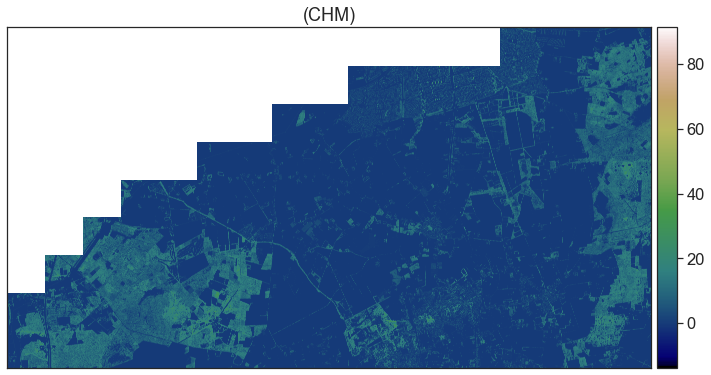

In [6]:
import rioxarray

DSM = rioxarray.open_rasterio("/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif", masked=True)
DTM = rioxarray.open_rasterio("/Users/Jorg/3D_houses_data/DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif", masked=True)
CHM = DSM - DTM

ep.plot_bands(CHM,
              cmap='gist_earth',
              title="(CHM)")
plt.show()


In [ ]:

"""
with rioxarray.open_rasterio(CHM, masked=True) as src:
    elevation = src.read(1)
    # Set masked values to np.nan
    elevation[elevation < 0] = np.nan

# Plot the data
ep.plot_bands(
    elevation,
    cmap="gist_earth",
    title="CHM",
    figsize=(10, 6),
)
"""

'\nwith rioxarray.open_rasterio(CHM, masked=True) as src:\n    elevation = src.read(1)\n    # Set masked values to np.nan\n    elevation[elevation < 0] = np.nan\n\n# Plot the data\nep.plot_bands(\n    elevation,\n    cmap="gist_earth",\n    title="CHM",\n    figsize=(10, 6),\n)\n'

In [ ]:
from osgeo import ogr

#from gdal import ogr
infile = ogr.Open("aWGS84.shp")
layer = infile.GetLayer()

AttributeError: 'NoneType' object has no attribute 'GetLayer'

<AxesSubplot:>

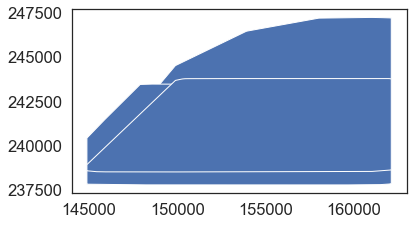

In [ ]:
shpfile = gpd.read_file(r"/Users/Jorg/3D_houses_data/DHMVIIDTMRAS1m_k01/DHMVII_vdc_k01/DHMVII_vdc_k01.shp")
shpfile.dtypes
x = shpfile['geometry'].convex_hull
x.plot()

In [ ]:
from osgeo import gdal

ds = gdal.Open(DSM)
gt = ds.GetGeoTransform()
proj = ds.GetProjection()
n_bands = ds.RasterCount
xsize = ds.RasterXSize
ysize = ds.RasterYSize
ds = None

ERROR 1: Passed object is neither of type string nor bytes


RuntimeError: not a string

In [ ]:
#This works only in python 3.9!!
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

sf = shapefile.Reader("/Users/Jorg/3D_houses_data/DHMVIIDTMRAS1m_k01/DHMVII_vdc_k01/DHMVII_vdc_k01.shp")

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

ModuleNotFoundError: No module named 'shapefile'

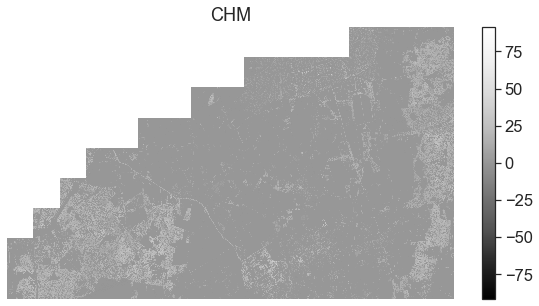

In [ ]:
# Plot the data and notice that the scale bar looks better
# No data values are now masked
f, ax = plt.subplots(figsize=(10, 5))
CHM.plot(cmap="Greys_r",
                 ax=ax)
ax.set_title("CHM")
ax.set_axis_off()
plt.show()


In [ ]:
import osgeo.gdal
dataset = osgeo.gdal.Open("/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif")
gt = dataset.GetGeoTransform()
gt

(145000.0, 1.0, 0.0, 247000.0, 0.0, -1.0)